In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%load_ext line_profiler

In [3]:
import json
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [4]:
from predict import Model
from predict import load_data
from utils import imsetshow

## 1.0 Configuration

In [5]:
config_file_path = "../config/config.json"
with open(config_file_path, "r") as read_file:
    config = json.load(read_file)
    
checkpoint_dir = config["paths"]["checkpoint_dir"]
run_subfolder = 'batch_32_views_32_min_32_beta_50.0_time_2019-07-03-23-09-50-039033'
checkpoint_filename = 'HRNet.pth'
checkpoint_file = os.path.join('..', checkpoint_dir, run_subfolder, checkpoint_filename)
# print(checkpoint_file)
assert os.path.isfile(checkpoint_file)

## 1.1 Load model

In [6]:
model = Model(config)
model.load_checkpoint(checkpoint_file=checkpoint_file)

## 1.2 Load data

In [7]:
train_dataset, val_dataset, test_dataset, baseline_cpsnrs = load_data(config_file_path, val_proportion=0.10, top_k=-1)

## 1.3 Run evaluation

In [8]:
results = model.evaluate(train_dataset, val_dataset, test_dataset, baseline_cpsnrs)

## 1.4 Benchmark % ESA Baseline

In [9]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
ESA,1450.0,4.637892e+01,3.779463,3.144905e+01,4.393971e+01,4.630870e+01,4.864591e+01,5.972002e+01
model,1160.0,4.887106e+01,3.460614,3.902493e+01,4.650822e+01,4.881733e+01,5.096222e+01,6.078957e+01
score,1160.0,9.509586e-01,0.030768,7.989020e-01,9.368286e-01,9.554815e-01,9.703933e-01,1.129954e+00
mean_clr,1450.0,3.882206e+06,190040.649017,2.340645e+06,3.815749e+06,3.916757e+06,4.009718e+06,4.158178e+06
std_clr,1450.0,3.742484e+05,115999.730132,4.393662e+04,3.036766e+05,3.845572e+05,4.557472e+05,1.046887e+06


In [10]:
results.loc[results['part'] == 'train'].describe().loc['mean']

ESA         4.645176e+01
model       4.884860e+01
score       9.506191e-01
mean_clr    3.876264e+06
std_clr     3.792498e+05
Name: mean, dtype: float64

In [11]:
results.loc[results['part'] == 'val'].describe().loc['mean']

ESA         4.682864e+01
model       4.907329e+01
score       9.540143e-01
mean_clr    3.876012e+06
std_clr     3.774258e+05
Name: mean, dtype: float64

In [12]:
results.loc[results['part'] == 'test'].describe().loc['mean']

ESA         4.593679e+01
model                NaN
score                NaN
mean_clr    3.906075e+06
std_clr     3.549721e+05
Name: mean, dtype: float64

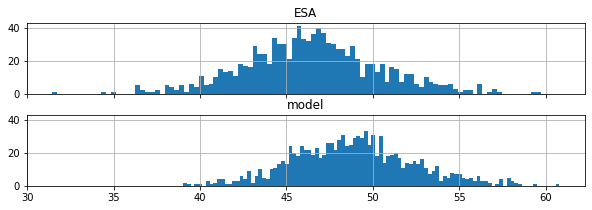

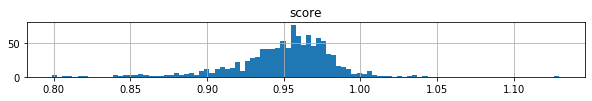

In [13]:
results.loc[results['part']=='train'].hist(column=['ESA', 'model'],
                                           sharex=True, sharey=True, bins=100, layout=(2,1), figsize=(10, 3));
results.loc[results['part']=='train'].hist(column=['score'],
                                           bins=100, figsize=(10, 1));

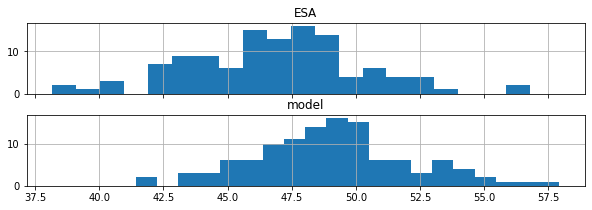

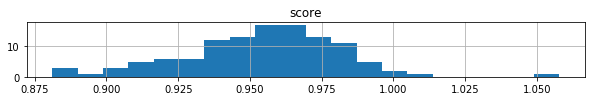

In [14]:
results.loc[results['part']=='val'].hist(column=['ESA', 'model'],
                                           sharex=True, sharey=True, bins=20, layout=(2,1), figsize=(10, 3));
results.loc[results['part']=='val'].hist(column=['score'],
                                           bins=20, figsize=(10, 1));

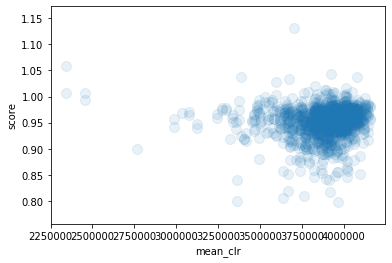

In [15]:
results.plot.scatter('mean_clr', 'score', s=100, alpha=.1);

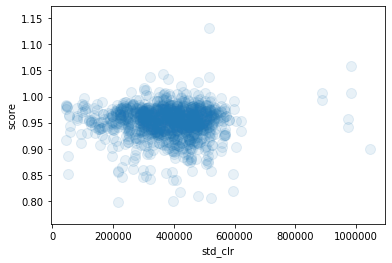

In [16]:
results.plot.scatter('std_clr', 'score', s=100, alpha=.1);

## 1.5 Pretty pics

In [17]:
results[results['part'] == 'val'].sort_values('score')

,ESA,model,clr,part,score,mean_clr,std_clr
imgset1130,42.054822,47.731781,"[4177410, 4177410, 4177410, 4177410, 4177155, ...",val,0.881065,3.824733e+06,457853.073843
imgset0418,47.818740,53.807396,"[4162365, 4162110, 4161600, 4161345, 4161090, ...",val,0.888702,3.991981e+06,272614.696031
imgset0939,48.108972,54.072781,"[4137885, 4135335, 4125390, 4117230, 4096320, ...",val,0.889708,3.871234e+06,399642.297542
imgset0372,42.605861,47.667698,"[4177920, 4177920, 4177920, 4175880, 4174860, ...",val,0.893810,3.958301e+06,428727.335230
imgset1095,40.426175,44.806961,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,0.902230,3.892371e+06,385018.900002
imgset0146,43.257774,47.681538,"[4137630, 4086885, 4068270, 4047615, 3956835, ...",val,0.907223,3.925748e+06,155207.004239
imgset0966,39.645691,43.696423,"[4135335, 4129215, 4113405, 4111620, 4108560, ...",val,0.907298,3.744916e+06,406695.186487
imgset0626,40.734552,44.842228,"[4152165, 4143495, 4142475, 4140945, 4138650, ...",val,0.908397,3.957218e+06,291394.361284
imgset1112,43.220437,47.569832,"[4177920, 4169505, 4162875, 4159560, 4153695, ...",val,0.908568,3.851532e+06,450127.392307
imgset0888,40.268199,44.277687,"[4177920, 4173585, 4173075, 4166955, 4166190, ...",val,0.909447,3.918946e+06,484231.017302


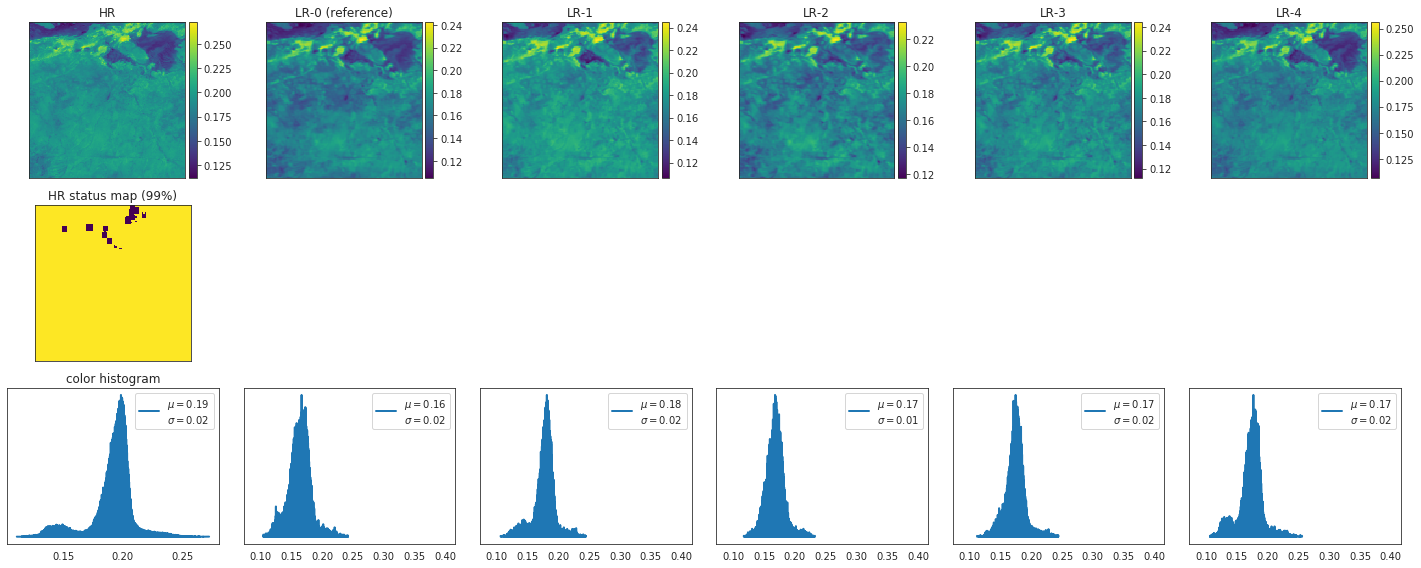

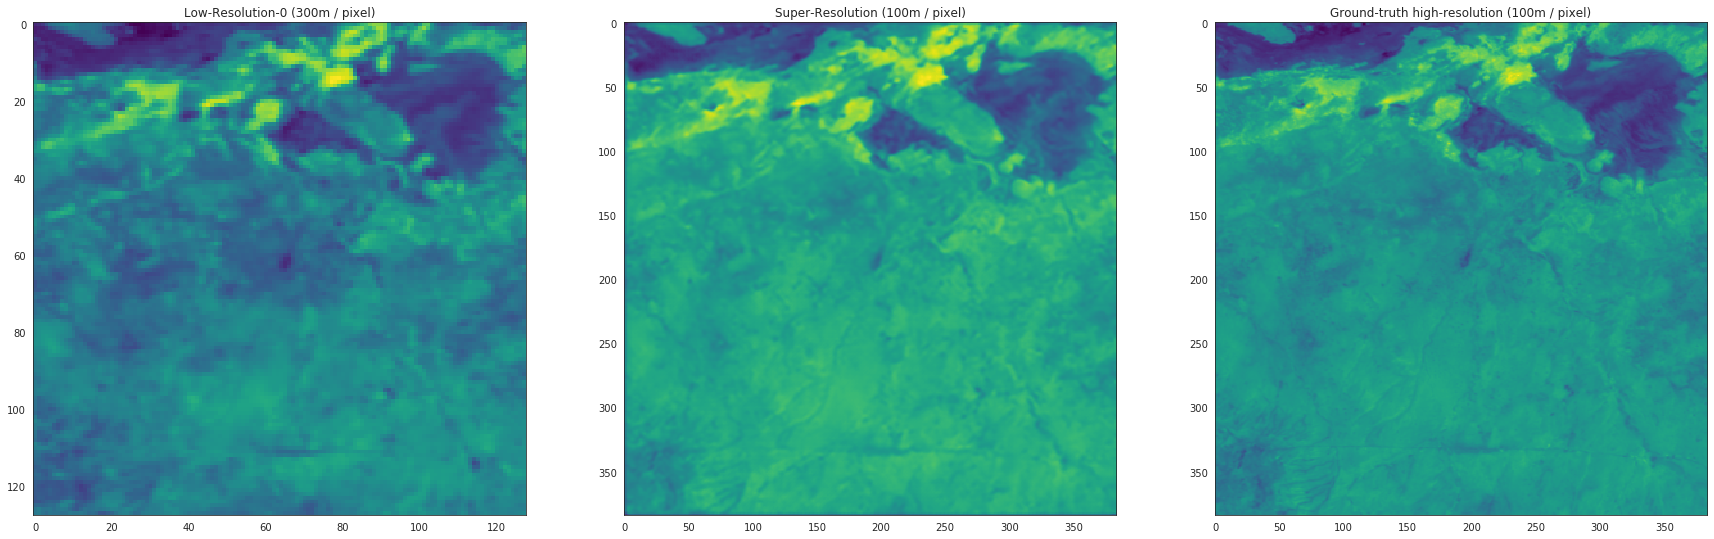

In [18]:
imset = val_dataset['imgset1130']
sr, scPSNR = model(imset)

imsetshow(imset, k=5, figsize=(20,8), resample=False, show_histogram=True, show_map=True)

plt.figure(figsize=(30, 10))
plt.subplot(131);  plt.imshow(imset['lr'][0]);  plt.title('Low-Resolution-0 (300m / pixel)');
plt.subplot(132);  plt.imshow(sr);  plt.title('Super-Resolution (100m / pixel)');
plt.subplot(133);  plt.imshow(imset['hr']);  plt.title('Ground-truth high-resolution (100m / pixel)');

## 1.6 Generate submission file

In [ ]:
model.generate_submission_file(imset_dataset=test_dataset, out='../submission')